# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [86]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [87]:
df_train.shape

(15223, 52)

In [88]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [89]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [90]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [91]:
df = df_test.append(df_train).reset_index(drop=True)

In [92]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [93]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее', 'Два и более высших образования', 'Неполное среднее', 'Ученая степень', 'Неоконченное высшее', 'Среднее специальное'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Другие сферы', 'Информационные технологии', 'ЧОП/Детективная д-ть', 'Недвижимость', 'Туризм', 'Энергетика', 'Сельское хозяйство', 'Торговля', 'Ресторанный бизнес/Общественное питание', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'Строительство', 'Информационные услуги', 'Банк/Финансы', 'Логистика', 'Управляющая компания', 'Здравоохранение', 'Металлургия/Промышленность/Машиностроение', 'Нефтегазовая промышленность', 'Коммунальное хоз-во/Дорожные службы', 'Развлечения/Искусство', 'Салоны красоты и здоровья', 'Государственная служба', 'Маркетинг', 'Сборочные производства', 'Транспорт', 'Подбор персонала', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Образование', 'Наука'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [94]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [23]:
# количество ячеек с пропусками
df.isnull().sum().sum()

46402

In [25]:
# список столбцов с пропусками
df.columns[df.isna().any()]

Index(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL',
       'JOB_DIR', 'TP_PROVINCE', 'REGION_NM', 'WORK_TIME',
       'PREVIOUS_CARD_NUM_UTILIZED'],
      dtype='object')

In [26]:
# число пропусков по фичам
df.isnull().sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

In [38]:
# что делать с пропусками.

# PREVIOUS_CARD_NUM_UTILIZED - вставить 0, исходя из описания столбца

# про отрасли работы GEN_INDUSTRY - смотреть, есть ли связь с SOCSTATUS_WORK_FL. если нет, то
# вариант А) внести Другие сферы
# вариант Б) предсказать по другим признакам

# вопрос: выбрать, какой вариант лучше - через построение двух моделей и расчета кривых качества?

#незаполненных данных у работающих много, поэтому применим вариант А или Б
df[df['SOCSTATUS_WORK_FL']==0].isnull().sum()

# Аналогично с GEN_TITLE: либо Другое, либо наиболее подходящее по зарплате, либо значительно 
# наиболее часто встречающееся значение Специалист

AGREEMENT_RK                     0
TARGET                           0
AGE                              0
SOCSTATUS_WORK_FL                0
SOCSTATUS_PENS_FL                0
GENDER                           0
CHILD_TOTAL                      0
DEPENDANTS                       0
EDUCATION                        0
MARITAL_STATUS                   0
GEN_INDUSTRY                  2712
GEN_TITLE                     2712
ORG_TP_STATE                  2712
ORG_TP_FCAPITAL               2707
JOB_DIR                       2712
FAMILY_INCOME                    0
PERSONAL_INCOME                  0
REG_ADDRESS_PROVINCE             0
FACT_ADDRESS_PROVINCE            0
POSTAL_ADDRESS_PROVINCE          0
TP_PROVINCE                     16
REGION_NM                        0
REG_FACT_FL                      0
FACT_POST_FL                     0
REG_POST_FL                      0
REG_FACT_POST_FL                 0
REG_FACT_POST_TP_FL              0
FL_PRESENCE_FL                   0
OWN_AUTO            

In [95]:

# TP_PROVINCE - по месту жительства (но сравнить с заполненными данными, послеживается ли эта связь)

# REGION_NM - вручную - ЗАПАДНО-СИБИРСКИЙ
pd.set_option('display.max_columns', 52)
print(df[df['REGION_NM'].isnull()])

       AGREEMENT_RK  TARGET  AGE  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  \
3099       61448233       0   54                  1                  0   
17420      61293307       0   64                  1                  0   

       GENDER  CHILD_TOTAL  DEPENDANTS            EDUCATION  MARITAL_STATUS  \
3099        1            2           0  Среднее специальное  Состою в браке   
17420       1            1           0  Среднее специальное     Разведен(а)   

                                  GEN_INDUSTRY             GEN_TITLE  \
3099   Ресторанный бизнес/Общественное питание               Рабочий   
17420                    Развлечения/Искусство  Работник сферы услуг   

                       ORG_TP_STATE ORG_TP_FCAPITAL  \
3099               Частная компания     Без участия   
17420  Государственная комп./учреж.     Без участия   

                             JOB_DIR           FAMILY_INCOME PERSONAL_INCOME  \
3099   Участие в основ. деятельности  от 20000 до 50000 руб.           10000

In [39]:
# ORG_TP_STATE - имеет смысл заполнять либо государственной, либо частной (их поровну и значительно
# больше остальных). Предсказать значение либо ввести новое значение категориального признака (Другое) 
df.groupby('ORG_TP_STATE')['ORG_TP_STATE'].count()

ORG_TP_STATE
Государственная комп./учреж.      12152
Индивидуальный предприниматель     1882
Некоммерческая организация          445
Частная ком. с инос. капиталом       45
Частная компания                  12896
Name: ORG_TP_STATE, dtype: int64

In [42]:
df.groupby('GEN_TITLE')['GEN_TITLE'].count()

GEN_TITLE
Военнослужащий по контракту         158
Высококвалифиц. специалист         1082
Другое                              355
Индивидуальный предприниматель      436
Партнер                              17
Работник сферы услуг               1118
Рабочий                            6025
Руководитель высшего звена          841
Руководитель низшего звена          268
Руководитель среднего звена        1396
Служащий                           1743
Специалист                        13981
Name: GEN_TITLE, dtype: int64

In [45]:
# ORG_TP_FCAPITAL заполнить также модой
df.groupby('ORG_TP_FCAPITAL')['ORG_TP_FCAPITAL'].count()

ORG_TP_FCAPITAL
Без участия    27099
С участием       326
Name: ORG_TP_FCAPITAL, dtype: int64

In [47]:
# аналогично JOB_DIR - можно заполнить наиболее частым признаком
df.groupby('JOB_DIR')['JOB_DIR'].count()

JOB_DIR
Адм-хоз. и трансп. службы          539
Бухгалтерия, финансы, планир.      957
Вспомогательный техперсонал       2091
Кадровая служба и секретариат      201
Пр-техн. обесп. и телеком.         145
Реклама и маркетинг                 22
Служба безопасности                318
Снабжение и сбыт                   433
Участие в основ. деятельности    22613
Юридическая служба                 101
Name: JOB_DIR, dtype: int64

In [56]:
# TP_PROVINCE
# можно заполнить на основании FACT_ADDRESS_PROVINCE
# (сравнив перед этим количества совпадений еще с REG_ADDRESS_PROVINCE/POSTAL_ADDRESS_PROVINCE)
print((df['TP_PROVINCE']==df['FACT_ADDRESS_PROVINCE']).sum())
print((df['TP_PROVINCE']==df['POSTAL_ADDRESS_PROVINCE']).sum())
print((df['TP_PROVINCE']==df['REG_ADDRESS_PROVINCE']).sum())


27476
27462
27355


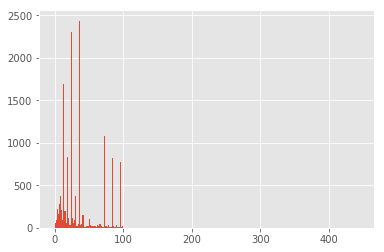

In [78]:
df['WORK_TIME'].hist(bins=100, range=[0,100])
# вероятно, в столбце некорректные данные, превышащие работоспособный возраст и вообще возраст
# (начинает работать с 16 лет?). Такие значения - в NA, а потом медианой
df[df['WORK_TIME'] > (df['AGE'] - 16) * 12]['WORK_TIME'].count()
# проверим, что у пенсионеров. Можно видеть, что все незаполненные данные в этой фиче именно у них.
df[(df['SOCSTATUS_PENS_FL']==1) & (df['SOCSTATUS_WORK_FL']==0)]['WORK_TIME'].isna().sum()
# непонятно, справедливо ли заполнять медианой фичи среди всех работающих
# заполним внутригрупповой медианой
df[(df['SOCSTATUS_PENS_FL']==1) & (df['WORK_TIME'] > (df['AGE'] - 16) * 12)]['WORK_TIME']
df[(df['SOCSTATUS_PENS_FL']==1) & (df['WORK_TIME']==0)].count()
df[(df['SOCSTATUS_PENS_FL']==1) & (df['SOCSTATUS_WORK_FL']==0)]['WORK_TIME'].hist()


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
# преобразовать в индикаторы

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [179]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
    df_output = df_output.drop('AGREEMENT_RK', axis = 1)
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].fillna('Другие сферы')
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].fillna(df_output['GEN_TITLE'].mode()[0])
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].fillna('Другое')
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].fillna(df_output['ORG_TP_FCAPITAL'].mode()[0])
    df_output['JOB_DIR'] = df_output['JOB_DIR'].fillna(df_output['JOB_DIR'].mode()[0])
    df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].fillna(df_output['FACT_ADDRESS_PROVINCE'])
    df_output['REGION_NM'] = df_output['REGION_NM'].fillna('ЗАПАДНО-СИБИРСКИЙ')
    # некорректно заполненные данные - в NA
    df_output.loc[df_output['WORK_TIME'] > (df_output['AGE'] - 16) * 12,'WORK_TIME'] = np.nan
    # заполняем в первую очередь работающих (в том числе работающих пенсионеров)
    df_output.loc[(df_output['SOCSTATUS_WORK_FL']==1) & (df_output['WORK_TIME'].isna()), 'WORK_TIME'] = df_output[df_output['SOCSTATUS_WORK_FL']==1]['WORK_TIME'].median()
    # во вторую очередь остальных пенсионеров
    df_output.loc[(df_output['SOCSTATUS_PENS_FL']==1)& (df_output['WORK_TIME'].isna()), 'WORK_TIME'] = df_output[df_output['SOCSTATUS_PENS_FL']==1]['WORK_TIME'].median()

    obj_columns  = df_output.columns[(df_output.dtypes == 'object') & (df_output.columns != 'sample')]
    
    df_output = pd.get_dummies(df_output, columns=obj_columns, drop_first=True)
    return df_output

Index(['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
       'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'],
      dtype='object')

In [187]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [186]:
df_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,...,TP_PROVINCE_Ставропольский край,TP_PROVINCE_Тамбовская область,TP_PROVINCE_Татарстан,TP_PROVINCE_Тверская область,TP_PROVINCE_Томская область,TP_PROVINCE_Тульская область,TP_PROVINCE_Тюменская область,TP_PROVINCE_Удмуртия,TP_PROVINCE_Ульяновская область,TP_PROVINCE_Хабаровский край,TP_PROVINCE_Ханты-Мансийский АО,TP_PROVINCE_Челябинская область,TP_PROVINCE_Читинская область,TP_PROVINCE_Чувашия,TP_PROVINCE_Якутия,TP_PROVINCE_Ярославская область,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,0,30,1,0,1,1,1,7000.0,0,1,0,0,1,1,0,0,0,0,0,0,3016.8,5,335.2,0,0,96,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,1,1,1,0,0,0,1,0,1,0,6000.0,6,2000.0,0,1,299,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,1,1,1,0,1,1,0,0,0,0,10000.0,6,2490.0,0,0,19,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,1,1,1,1,0,0,0,0,0,0,5175.0,4,575.0,0,0,252,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,1,1,1,0,0,0,0,0,0,0,13065.0,6,10000.0,0,0,36,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Задание 5. Обучение и оценка качества разных моделей

In [191]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
df_train_preproc_y = df_train_preproc['TARGET']
df_train_preproc_x = df_train_preproc.drop('TARGET',1)

X_train, X_test, y_train, y_test = train_test_split(df_train_preproc_x, df_train_preproc_y, test_size=0.3, random_state=42)


In [196]:
y_train.head()

14961    0
19660    0
17214    0
28721    0
22627    0
Name: TARGET, dtype: int64

In [203]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)
predict_dtc_p = dtc.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
predict_rfc_p = rfc.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_lr_p = lr.predict_proba(X_test)

In [202]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print("Decision Tree")
print('precision', precision_score(y_test, predict_dtc))
print('recall', recall_score(y_test, predict_dtc))
print('accuracy', accuracy_score(y_test, predict_dtc))

print("Random Forest")
print('precision', precision_score(y_test, predict_rfc))
print('recall', recall_score(y_test, predict_rfc))
print('accuracy', accuracy_score(y_test, predict_rfc))

print("Logistic Regression")
print('precision', precision_score(y_test, predict_lr))
print('recall', recall_score(y_test, predict_lr))
print('accuracy', accuracy_score(y_test, predict_lr))


Decision Tree
precision 0.1783783783783784
recall 0.1783783783783784
accuracy 0.8003065469673747
Random Forest
precision 0.15
recall 0.005405405405405406
accuracy 0.8754105539741625
Logistic Regression
precision 0.2857142857142857
recall 0.0036036036036036037
accuracy 0.877819137289249


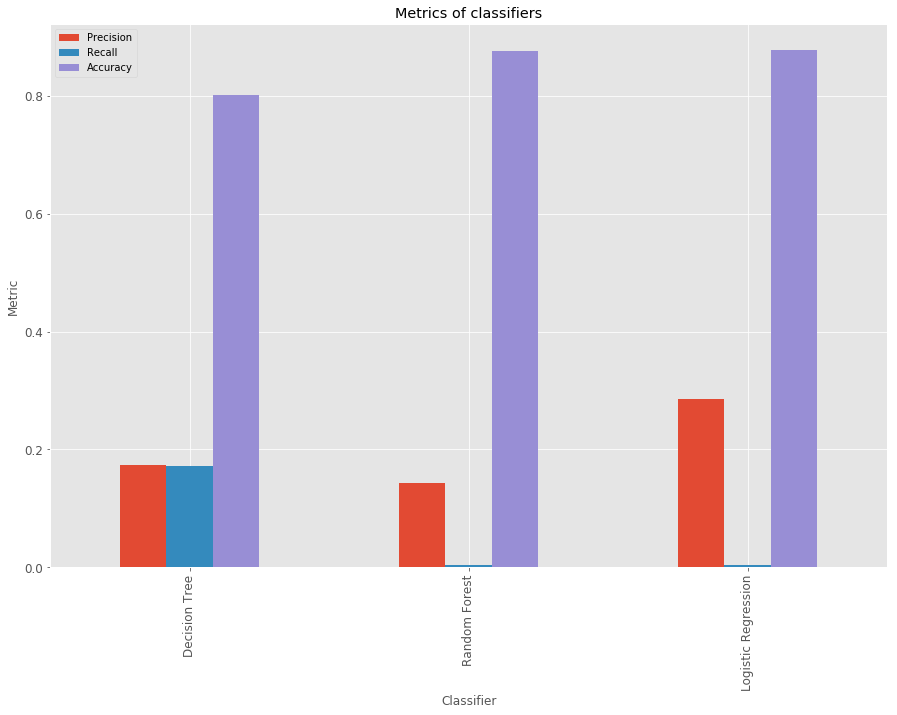

In [238]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

metrics_df = pd.DataFrame({
    'Classifier': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Precision': list(map(lambda x: precision_score(y_test, x), [predict_dtc, predict_rfc, predict_lr])),
    'Recall': list(map(lambda x: recall_score(y_test, x), [predict_dtc, predict_rfc, predict_lr])),
    'Accuracy': list(map(lambda x: accuracy_score(y_test, x), [predict_dtc, predict_rfc, predict_lr]))
})

import matplotlib.pyplot as plt
ax = metrics_df[['Classifier', 'Precision','Recall', 'Accuracy']].plot(x = 'Classifier', kind='bar', title ="Metrics of classifiers", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Classifier", fontsize=12)
ax.set_ylabel("Metric", fontsize=12)
plt.show()

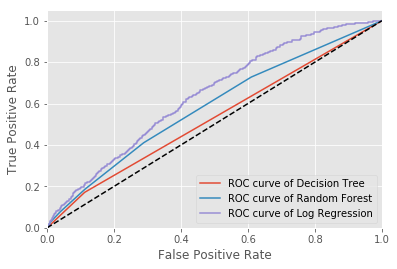

ROC auc of Decision Tree is 0.529503830849793
ROC auc of Random Forest is 0.5837332596804182
ROC auc of Log Regression is 0.6383956239389937


[None, None, None]

In [269]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
classif = dict()

fpr[0], tpr[0], thresholds[0] = roc_curve(y_test, predict_dtc_p[:,1])
classif[0] = 'Decision Tree'
fpr[1], tpr[1], thresholds[1] = roc_curve(y_test, predict_rfc_p[:,1])
classif[1] = 'Random Forest'
fpr[2], tpr[2], thresholds[2] = roc_curve(y_test, predict_lr_p[:,1])
classif[2] = 'Log Regression'

plt.figure()

for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0}'
                                   ''.format(classif[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

list(map(lambda x,y : print('ROC auc of {0} is {1}'.format(classif[x], roc_auc_score(y_test, y[:,1]))), classif, [predict_dtc_p, predict_rfc_p, predict_lr_p]))

In [271]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
dtc_roc_aucs = cross_val_score(dtc, X_train, y_train, scoring='roc_auc', cv=10)
rfc_roc_aucs = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=10)
lr_roc_aucs = cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv=10)


In [275]:
list(map(lambda x, y: print('Mean roc auc for {0} is {1}'.format(classif[x], y.mean())), classif, [dtc_roc_aucs, rfc_roc_aucs, lr_roc_aucs]))

Mean roc auc for Decision Tree is 0.5248163310469545
Mean roc auc for Random Forest is 0.5832974981576252
Mean roc auc for Log Regression is 0.6273046048254571


[None, None, None]

In [279]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
# predict_lr_p - то, что нам надо
df_test_preproc_y = df_test_preproc['TARGET']
df_test_preproc_x = df_test_preproc.drop('TARGET',1)
predict_lr_test_p = lr.predict_proba(df_test_preproc_x)
predict_lr_test_p

array([[0.83439637, 0.16560363],
       [0.94109948, 0.05890052],
       [0.82365149, 0.17634851],
       ...,
       [0.81335348, 0.18664652],
       [0.95510705, 0.04489295],
       [0.81132873, 0.18867127]])

In [ ]:
# Померить roc_auc на тесте


In [280]:
roc_auc_score(df_test_preproc_y, predict_lr_test_p[:,1])

0.6211338254450718